# Bitirme - Sonuncu Dosya

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv("credit_customers.csv") #csv dosyasını çağırma

In [3]:
df.head() #verilerimizin ilk 5 satırına bakmak için kullanılır

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad


In [4]:
df.iloc[:,:8].head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0


In [5]:
df.iloc[:, 8:17].head()

,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job
0,male single,none,4.0,real estate,67.0,none,own,2.0,skilled
1,female div/dep/mar,none,2.0,real estate,22.0,none,own,1.0,skilled
2,male single,none,3.0,real estate,49.0,none,own,1.0,unskilled resident
3,male single,guarantor,4.0,life insurance,45.0,none,for free,1.0,skilled
4,male single,none,4.0,no known property,53.0,none,for free,2.0,skilled


In [6]:
df.iloc[:, 17:21].head()

,num_dependents,own_telephone,foreign_worker,class
0,1.0,yes,yes,good
1,1.0,none,yes,bad
2,2.0,none,yes,good
3,2.0,none,yes,good
4,2.0,none,yes,bad


In [7]:
df.rename(columns={"checking_status":"KD",
                   "duration":"S",
                  "credit_history":"KG",
                   "purpose":"KA",
                  "credit_amount":"KM",
                  "savings_status":"TD",
                  "employment":"CS",
                  "installment_commitment":"HGY",
                  "personal_status":"KDEB",
                  "other_parties":"DK",
                   "residence_since":"XYİ",
                   "property_magnitude":"M",
                   "age":"Y",
                   "other_payment_plans":"DTP",
                   "housing":"KKK",
                   "existing_credits":"MK",
                   "job":"is",
                   "num_dependents":"BKS",
                   "own_telephone":"T",
                   "foreign_worker":"Yİ",
                   "class":"siniflandirma"
                  },inplace=True) 
#mevcut sütun isimlerini değiştirildi

# Sütun İsimleri
1.   KD   = Kontrol Durumu
2.   S    = Süre
3.   KD   = Kredi Geçmişi
4.   KA   = Kredinin Amacı
5.   KM   = Kredi Miktarı
6.   TD   = Tasarruf Durumu 
7.   CS   = Çalışma Süresi 
8.   HGY  = Harcanabilir Gelir Yüzdesi
9.   DK   = Diğer Kefiller
10.  M    = Mülk
11.  Y    = Yaş
12.  KKK  = Konut Kira/Kendi
13.  MK   = Mevcut Krediler
14.  is   = iş
15.  BKS  = Baktığı kişi sayısı
16.  T    = Telefon
17.  Yİ   = Yabancı İşçi
18.  siniflandirma    = Hedef değişken sütunumuz

In [8]:
df.drop('XYİ',axis=1, inplace=True) # X yilindan beri ikametgah
df.drop('DTP',axis=1, inplace=True) # Diger taksit planlari
df.drop('KDEB',axis=1, inplace=True) #Kişisel durum cinsiyet / evli bekar

In [9]:
df.head()

,KD,S,KG,KA,KM,TD,CS,HGY,DK,M,Y,KKK,MK,is,BKS,T,Yİ,siniflandirma
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,none,real estate,67.0,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,none,real estate,22.0,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,none,real estate,49.0,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,guarantor,life insurance,45.0,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,none,no known property,53.0,for free,2.0,skilled,2.0,none,yes,bad


In [10]:
df["siniflandirma"] = df["siniflandirma"].replace("bad","kotu")
df["siniflandirma"] = df["siniflandirma"].replace("good","iyi")
#sınıflandırma hedef sütunumuzdaki bad kötü , good iyi olarak değiştirildi

In [11]:
df.shape #satır ve sütun sayımız

(1000, 18)

In [12]:
df.info()
#veri setimiz hakkındaki genel bilgileri ve veritiplerini görmemiz için

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   KD             1000 non-null   object 
 1   S              1000 non-null   float64
 2   KG             1000 non-null   object 
 3   KA             1000 non-null   object 
 4   KM             1000 non-null   float64
 5   TD             1000 non-null   object 
 6   CS             1000 non-null   object 
 7   HGY            1000 non-null   float64
 8   DK             1000 non-null   object 
 9   M              1000 non-null   object 
 10  Y              1000 non-null   float64
 11  KKK            1000 non-null   object 
 12  MK             1000 non-null   float64
 13  is             1000 non-null   object 
 14  BKS            1000 non-null   float64
 15  T              1000 non-null   object 
 16  Yİ             1000 non-null   object 
 17  siniflandirma  1000 non-null   object 
dtypes: float6

In [13]:
df.describe() #sayısal özniteliklerimizin istatiksel özelliklerine bakıldı
#kredi ödeme süresi ortalama 20.903000 min 4 max 72 ay std sapması ise 12.05
#kredi miktarı ortalama 3271.258 min 250 max 18424 std sapması ise 2822.73

,S,KM,HGY,Y,MK,BKS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,75.000000,4.000000,2.000000


iyi     700
kotu    300
Name: siniflandirma, dtype: int64

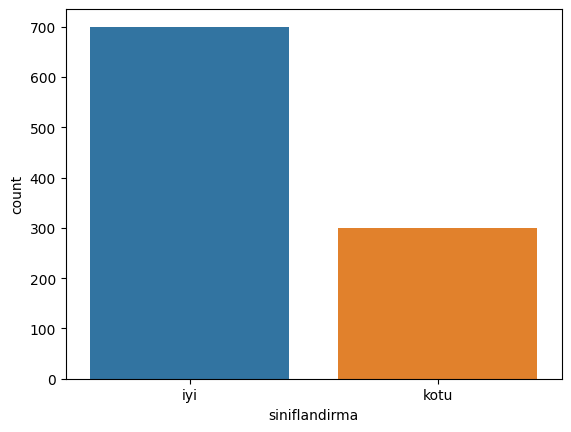

In [14]:
sns.countplot(x = "siniflandirma",data=df)
df.loc[:,"siniflandirma"].value_counts()
#sınıflandırma değerlerinin sayılarını görselleştirmek için kullanıldı

In [15]:
df.isnull().sum()
#Boş veri kayıp veri var mı diye bakıldı 
#.sum() her bir sütundaki eksik değer sayısını hesaplamak için kullanılır.

KD               0
S                0
KG               0
KA               0
KM               0
TD               0
CS               0
HGY              0
DK               0
M                0
Y                0
KKK              0
MK               0
is               0
BKS              0
T                0
Yİ               0
siniflandirma    0
dtype: int64

In [16]:
for c in df.columns:
    print('Column {} unique values: {}'.format(c, len(df[c].unique())))
#Veri setindeki her bir sütun için benzersiz birbirinden farklı değer sayısını hesaplamak için kullanıldı

Column KD unique values: 4
Column S unique values: 33
Column KG unique values: 5
Column KA unique values: 10
Column KM unique values: 921
Column TD unique values: 5
Column CS unique values: 5
Column HGY unique values: 4
Column DK unique values: 3
Column M unique values: 4
Column Y unique values: 53
Column KKK unique values: 3
Column MK unique values: 4
Column is unique values: 4
Column BKS unique values: 2
Column T unique values: 2
Column Yİ unique values: 2
Column siniflandirma unique values: 2


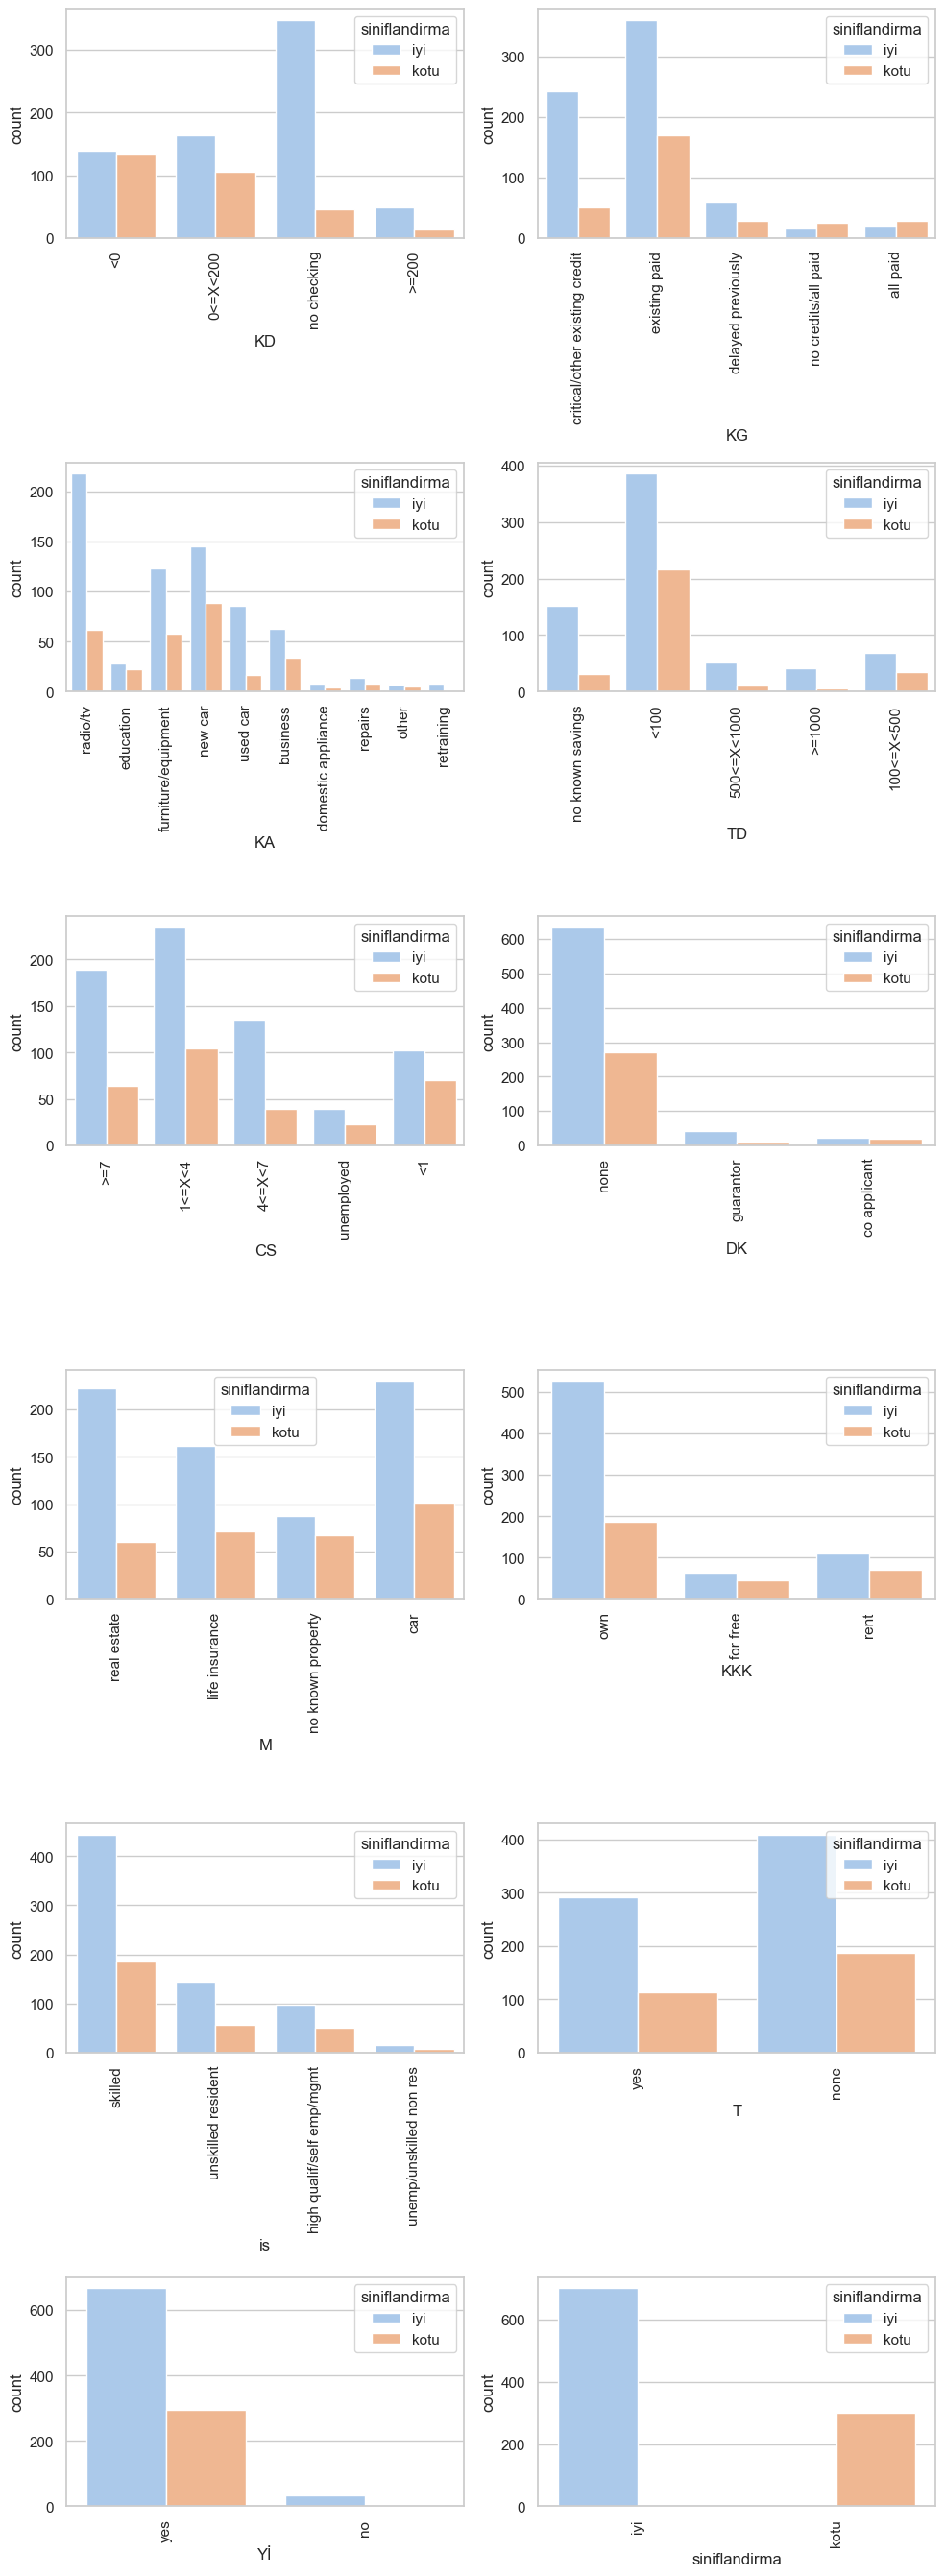

In [17]:
sns.set_theme(style="whitegrid", palette="pastel")
plt.figure(figsize = (10, 50))

kategorik_liste = df.select_dtypes(include='object').columns


x=0
for i in kategorik_liste:
    x+=1
    plt.subplot(11, 2, x)
    plt.xticks(rotation=90) #x eksenindeki değerlerin 90 derece döndürülmesini sağlar, böylece sütun adları daha iyi okunabilir hale gelir.
    sns.countplot(x = i, hue = 'siniflandirma',  data = df)
    plt.tight_layout() #grafikler arasındaki boşlukları optimize etmek için kullanılır
#Burda kategorik verilerimizin hedef (siniflandirma) ile arasındaki ilişkiyi gösteren grafik çizdirildi


In [18]:
kategorik = ['KD','KG','KA','TD',
                 'CS','DK',
                 'M','KKK','is','T',
                 'Yİ','siniflandirma']
#Kategorik verilerimizi sayısal verilere değiştirmek için bir listeye içine attık

In [19]:
le = LabelEncoder()
for column in kategorik:
    df[column] = le.fit_transform(df[column])
#LabelEncoder ile kategorik verilerimizi transform sayısal verilere dönüştürüldü

In [20]:
df.head() 
#Bu işlemlerin doğruluğunu görebilmek için veri setinin ilk 5 satırını tekrar çağırma işlemi yapıldı.

,KD,S,KG,KA,KM,TD,CS,HGY,DK,M,Y,KKK,MK,is,BKS,T,Yİ,siniflandirma
0,1,6.0,1,6,1169.0,4,3,4.0,2,3,67.0,1,2.0,1,1.0,1,1,0
1,0,48.0,3,6,5951.0,2,0,2.0,2,3,22.0,1,1.0,1,1.0,0,1,1
2,3,12.0,1,2,2096.0,2,1,2.0,2,3,49.0,1,1.0,3,2.0,0,1,0
3,1,42.0,3,3,7882.0,2,1,2.0,1,1,45.0,0,1.0,1,2.0,0,1,0
4,1,24.0,2,4,4870.0,2,0,3.0,2,2,53.0,0,2.0,1,2.0,0,1,1


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   KD             1000 non-null   int32  
 1   S              1000 non-null   float64
 2   KG             1000 non-null   int32  
 3   KA             1000 non-null   int32  
 4   KM             1000 non-null   float64
 5   TD             1000 non-null   int32  
 6   CS             1000 non-null   int32  
 7   HGY            1000 non-null   float64
 8   DK             1000 non-null   int32  
 9   M              1000 non-null   int32  
 10  Y              1000 non-null   float64
 11  KKK            1000 non-null   int32  
 12  MK             1000 non-null   float64
 13  is             1000 non-null   int32  
 14  BKS            1000 non-null   float64
 15  T              1000 non-null   int32  
 16  Yİ             1000 non-null   int32  
 17  siniflandirma  1000 non-null   int32  
dtypes: float6

In [22]:
df.corr() #veri ön işleme ve hazırlama süreçlerinden biri olan korelasyon analizi yapıldı

,KD,S,KG,KA,KM,TD,CS,HGY,DK,M,Y,KKK,MK,is,BKS,T,Yİ,siniflandirma
KD,1.000000,-0.096005,-0.110683,0.091150,-0.092638,0.097452,-0.030032,0.029780,0.084286,-0.019556,0.083636,-0.012511,0.084513,-0.029085,0.030417,0.037208,-0.014658,-0.302406
S,-0.096005,1.000000,0.029430,-0.002025,0.624984,0.020843,0.003824,0.074749,-0.006711,-0.163388,-0.036136,-0.157049,-0.011284,-0.215438,-0.023834,0.164718,0.138196,0.214927
KG,-0.110683,0.029430,1.000000,-0.020981,0.029050,-0.031958,-0.088158,-0.059779,0.011296,-0.040035,-0.157261,0.084026,-0.387820,-0.013921,-0.070008,-0.039237,0.000513,0.097054
KA,0.091150,-0.002025,-0.020981,1.000000,0.052295,0.085496,0.079626,0.016287,-0.020563,-0.025888,0.033211,-0.063321,-0.022895,-0.072347,0.025098,0.013023,0.008556,-0.138152
KM,-0.092638,0.624984,0.029050,0.052295,1.000000,0.070127,0.038756,-0.271316,-0.037921,-0.139859,0.032716,-0.135632,0.020795,-0.261139,0.017142,0.276995,0.050050,0.154739
TD,0.097452,0.020843,-0.031958,0.085496,0.070127,1.000000,0.056865,0.032940,0.031213,0.040929,0.094760,-0.032711,0.015568,-0.040662,0.023693,0.075988,-0.012566,-0.103133
CS,-0.030032,0.003824,-0.088158,0.079626,0.038756,0.056865,1.000000,0.074664,0.007275,-0.022536,0.289741,-0.126529,0.085495,-0.142279,0.028019,0.110568,0.064760,0.008932
HGY,0.029780,0.074749,-0.059779,0.016287,-0.271316,0.032940,0.074664,1.000000,0.014835,-0.018899,0.058266,-0.089405,0.021669,-0.078090,-0.071207,0.014413,0.090024,0.072404
DK,0.084286,-0.006711,0.011296,-0.020563,-0.037921,0.031213,0.007275,0.014835,1.000000,-0.108191,0.028294,-0.061302,0.017662,-0.014927,0.010990,0.050996,0.107639,-0.028441
M,-0.019556,-0.163388,-0.040035,-0.025888,-0.139859,0.040929,-0.022536,-0.018899,-0.108191,1.000000,0.125947,-0.100211,-0.001577,0.211556,0.066592,-0.105979,-0.108188,-0.055529


Text(0.5, 1.0, 'Korelasyon Isı Haritası')

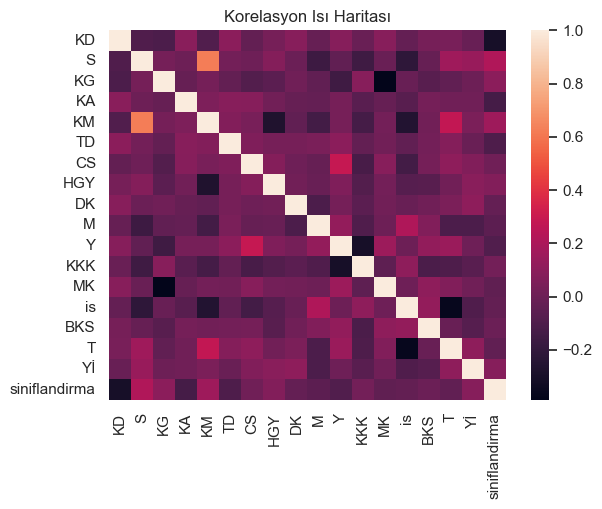

In [23]:
sns.heatmap(df.corr())
plt.title('Korelasyon Isı Haritası')
#Verilerin arasındaki ilişkiyi görselleştirmek için ısı haritası kullanıldı

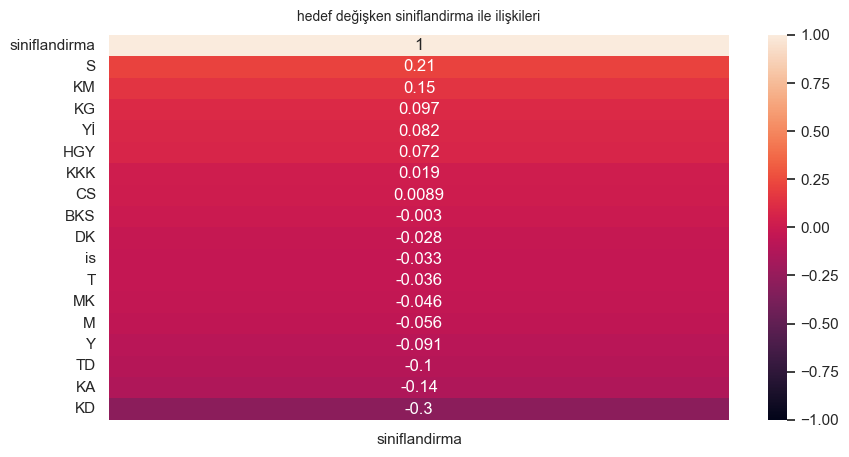

In [24]:
plt.figure (figsize = (10, 5))
heatmap = sns.heatmap (df.corr()[['siniflandirma']].sort_values (by = 'siniflandirma', ascending = False), vmin = -1, vmax = 1, annot = True)
heatmap.set_title ('hedef değişken siniflandirma ile ilişkileri', fontdict = {'fontsize':10}, pad = 10);
#hedef değişken (sınıflandırma) ile diğer değişkenler arasındaki korelasyonları görselleştirmek için kullanıldı

In [25]:
df.corr().nlargest(4,'siniflandirma').index
#siniflandirma değişkenine göre en yüksek korelasyona sahip olan dört değişkenin indekslerini döndürür.Yani sınıflandırma değişkeni ile en güçlü korelasyona sahip olan dört değişkenin indekslerini verir.

Index(['siniflandirma', 'S', 'KM', 'KG'], dtype='object')

# Lojistik Regresyon

In [26]:
from sklearn import linear_model #Sklearn kütüphanesinin linear_model modülü eklendi
from sklearn.model_selection import cross_val_score 
log_reg = linear_model.LogisticRegression() #Lojistik model nesnesi oluşturuldu

In [27]:
x=df[['S', 'KM', 'KG']]
y=df.iloc[:,17] #18.Sütunu yani hedef sütunumuz olan siniflandirmayı temsil eder

In [28]:
x
#x değişkenine 'sure', 'kredi_miktari' ve 'kredi_gecmisi' sütunlarını attık

,S,KM,KG
0,6.0,1169.0,1
1,48.0,5951.0,3
2,12.0,2096.0,1
3,42.0,7882.0,3
4,24.0,4870.0,2
...,...,...,...
995,12.0,1736.0,3
996,30.0,3857.0,3
997,12.0,804.0,3
998,45.0,1845.0,3


In [29]:
y
#y değişkenine veri çerçevesinin 20. sütununu atıyoruz. Bu sütun hedef değişkenimizi olan 'siniflandirma'yı temsil ediyor.

0      0
1      1
2      0
3      0
4      1
      ..
995    0
996    0
997    0
998    1
999    0
Name: siniflandirma, Length: 1000, dtype: int32

In [39]:
log_reg_score = cross_val_score(log_reg,x,y,cv =10,scoring='accuracy').mean()
#Burada modeli eğitip verinin kaç parçaya bölünüp bir öğrenme gerçekleştileceğini söylüyoruz.

# Parametrelerin anlamları:

1. log_reg: Lojistik regresyon modeli.
2. x: Bağımsız değişkenlerin olduğu veri kümesi.
3. y: Hedef değişkenin olduğu veri kümesi.
4. cv: Katlama sayısı, yani veri kümesinin kaç parçaya bölüneceği.
5. scoring: Performans ölçütü, burada doğruluk (accuracy) kullanılmıştır.
6. Sonuç olarak, log_reg_score değişkenine lojistik regresyon modelinin çapraz doğrulama ile elde edilen ortalama doğruluk skoru atanır. Bu skor, modelin sınıflandırma performansını değerlendirmek için kullanılabilir.

In [40]:
log_reg_score

0.707

In [41]:
log_reg.fit(x,y)

LogisticRegression()

In [42]:
sure = 45
kredi_miktari = 1169
kredi_gecmisi = 5
prediction = log_reg.predict([[sure,kredi_miktari,kredi_gecmisi]])

C:\Users\Mert\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [43]:
prediction

array([1])

              precision    recall  f1-score   support

           0       0.71      0.97      0.82       209
           1       0.57      0.09      0.15        91

    accuracy                           0.70       300
   macro avg       0.64      0.53      0.49       300
weighted avg       0.67      0.70      0.62       300



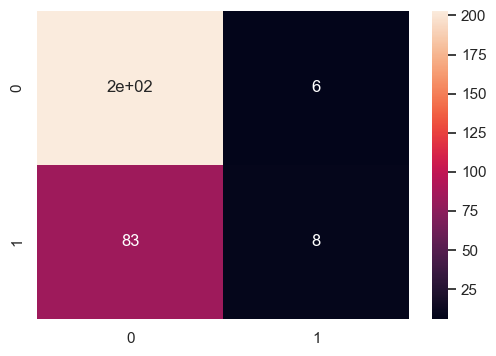

In [44]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
#Bu satır veri kümemizin eğitim ve test kümelerini ayırır x_train ve x_test sure,kredi_miktari_kredi_gecmisi 
#eğitim ve test verilerini içeren veri kümesidir.y_train ve y_test bağımlı değişken siniflandirmadir.
#Tekrar modeli çağırmamıza gerek yok çünkü yukarıda çağırmıştık log_reg = linear_model.LogisticRegression()
log_reg.fit(X_train, y_train) # Bu satırda, oluşturulan lojistik regresyon modeli X_train ve y_train verileri kullanılarak eğitilir.
y_pred = log_reg.predict(X_test) # Bu satırda, eğitilen model X_test verilerini kullanarak tahmin yapar ve tahmin sonuçlarını y_pred değişkenine kaydeder.
report = classification_report(y_test, y_pred) #bu ve
print(report)# Bu satırlarda, classification_report fonksiyonu kullanılarak sınıflandırma raporu oluşturulur ve ekrana yazdırılır.
cf_matrix = confusion_matrix(y_test, y_pred) # Bu satırlarda, karışıklık matrisi (confusion_matrix) hesaplanır ve seaborn kütüphanesi kullanılarak bir ısı haritası olarak görselleştirilir. #y_test gerçek hedef değerlerini içeren test veri setidir. Bu veri seti, modelin tahminlerini karşılaştırmak için kullanılır.

#y_pred ise modelin test veri seti üzerinde yaptığı tahminlerdir. Model, test veri setindeki örneklerin sınıf etiketlerini tahmin eder ve bu tahminler y_pred değişkeninde tutulur.
plt.figure(figsize=(6, 4))
sns.heatmap(cf_matrix, annot=True)
plt.show()

# Naive Bayes
Algoritma bir eleman için her durumun olasılığını hesaplar ve olasılık değeri en yüksek olana göre sınıflandırır 3 gruba ayrılır.
GaussianNB
MultinominalNB
BernoulliNB
Biz sadece Gaussianı kullandık

In [45]:
naive_bayes = GaussianNB() #Nesnemizi oluşturduk
naive_bayes.fit(X_train, y_train) #Modeli eğitiyoruz

naive_bayes_score = cross_val_score(naive_bayes, X_train, y_train, cv=10, scoring='accuracy').mean()

In [46]:
naive_bayes_score

0.7214285714285713

              precision    recall  f1-score   support

           0       0.71      0.93      0.81       209
           1       0.46      0.14      0.22        91

    accuracy                           0.69       300
   macro avg       0.59      0.54      0.51       300
weighted avg       0.64      0.69      0.63       300



<Axes: >

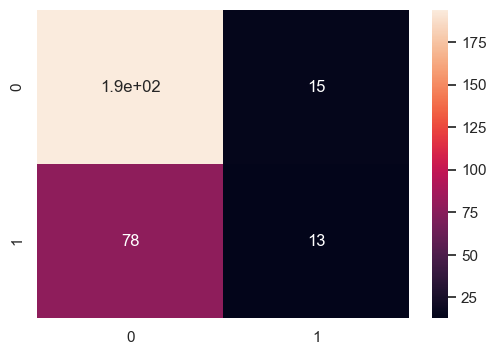

In [47]:
y_pred = naive_bayes.predict(X_test) # test veri seti x_test  üzerindeki verileri kullanarak modelin tahminlerini yapıyoruz.
print(classification_report(y_test, y_pred)) # Sınıflandırma raporunu (classification report) yazdırıyoruz. Bu rapor, modelin sınıflandırma performansını farklı metriklerle değerlendirir: kesinlik (precision), duyarlılık (recall), F1 skoru vb.
nb_accuracy=accuracy_score(y_test, y_pred) # Tahminlerin doğruluk oranını hesaplıyoruz.
nb_f1=f1_score(y_test, y_pred) # Tahminlerin F1 skorunu hesaplıyoruz.
nb_recall=recall_score(y_test, y_pred) # Tahminlerin duyarlılık (recall) skorunu hesaplıyoruz.
nb_precision=precision_score(y_test, y_pred) # Tahminlerin kesinlik (precision) skorunu hesaplıyoruz.


cf_matrix=confusion_matrix(y_test, y_pred) #  Karmaşıklık matrisini hesaplıyoruz. Bu matris, modelin doğru ve yanlış sınıflandırmalarını gösterir.
plt.figure(figsize = (6,4))
sns.heatmap(cf_matrix, annot=True)#Karmaşıklık matrisini ısı haritası olarak görselleştiriyoruz. 

#Precision (Kesinlik): Sınıf 0 için doğru tahmin oranı %71, sınıf 1 için ise %46'dır. Yani, model sınıf 0'ı tahmin ederken %71 oranında doğru, sınıf 1'i tahmin ederken ise %46 oranında doğru tahmin yapmıştır.

#Recall (Duyarlılık): Sınıf 0 için doğru sınıf tespit oranı %93, sınıf 1 için ise %14'tür. Model, sınıf 0'ı daha iyi tespit ederken sınıf 1'i daha düşük bir başarıyla tespit etmiştir.

#F1-score: Sınıf 0 için F1-score değeri 0.81, sınıf 1 için ise 0.22'dir. F1-score, kesinlik ve duyarlılık değerlerini dengeli bir şekilde birleştirir. Sınıf 0 için iyi bir F1-score elde edilirken, sınıf 1 için düşük bir F1-score değeri vardır.

#Support: Sınıf 0 için 209 örnek, sınıf 1 için 91 örnek bulunmaktadır. Bu, her sınıfın gerçek veri setinde kaç örneğe sahip olduğunu gösterir.

#Accuracy (Doğruluk): Modelin doğru sınıflandırma oranı %69'dur. Yani, veri noktalarının %69'u doğru bir şekilde sınıflandırılmıştır.

#Macro Avg ve Weighted Avg: Bu iki metrik, sınıfların ortalama performansını ölçer. Macro avg, tüm sınıfların performansını eşit olarak değerlendirirken, weighted avg sınıfların örnek sayılarına göre ağırlıklandırılmış bir ortalama değeridir.

In [48]:
naive_bayes.fit(x, y)

GaussianNB()

In [54]:
sure = 3
kredi_miktari = 4500
kredi_gecmisi = 3
prediction1 = naive_bayes.predict([[sure, kredi_miktari, kredi_gecmisi]])

C:\Users\Mert\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [55]:
prediction1

array([0])

# Karar Ağacı Algoritması
Sınıflama , özellik ve hedefe göre karar düğümleri ve yaprak düğümlerinden oluşan ağaç yapısı formunda model oluşturan bir sınıflandırma yöntemidir.

              precision    recall  f1-score   support

           0       0.69      0.72      0.70       209
           1       0.28      0.24      0.26        91

    accuracy                           0.58       300
   macro avg       0.48      0.48      0.48       300
weighted avg       0.56      0.58      0.57       300



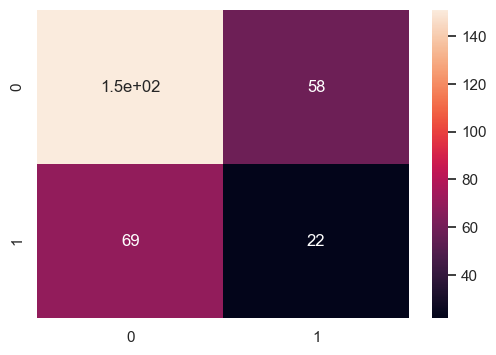

In [56]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
# Veri kümesini eğitim ve test kümelerine ayırma
decision_tree = DecisionTreeClassifier() # Karar ağacı modeli oluşturma
decision_tree.fit(X_train, y_train) # Modeli eğitme
y_pred = decision_tree.predict(X_test) # Test verileri üzerinde tahmin yapma
report = classification_report(y_test, y_pred) # Sınıflandırma raporunu oluşturma ve yazdırma
print(report)
cf_matrix = confusion_matrix(y_test, y_pred) # Karışıklık matrisini oluşturma
plt.figure(figsize=(6, 4)) # Karışıklık matrisini ısı haritası olarak görselleştirme
sns.heatmap(cf_matrix, annot=True)
plt.show()


# KNN En yakın komşu algoritması

              precision    recall  f1-score   support

           0       0.71      0.86      0.78       209
           1       0.38      0.20      0.26        91

    accuracy                           0.66       300
   macro avg       0.54      0.53      0.52       300
weighted avg       0.61      0.66      0.62       300



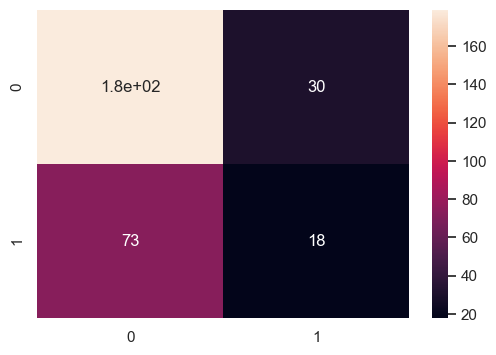

In [46]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

report = classification_report(y_test, y_pred)
print(report)

cf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cf_matrix, annot=True)
plt.show()

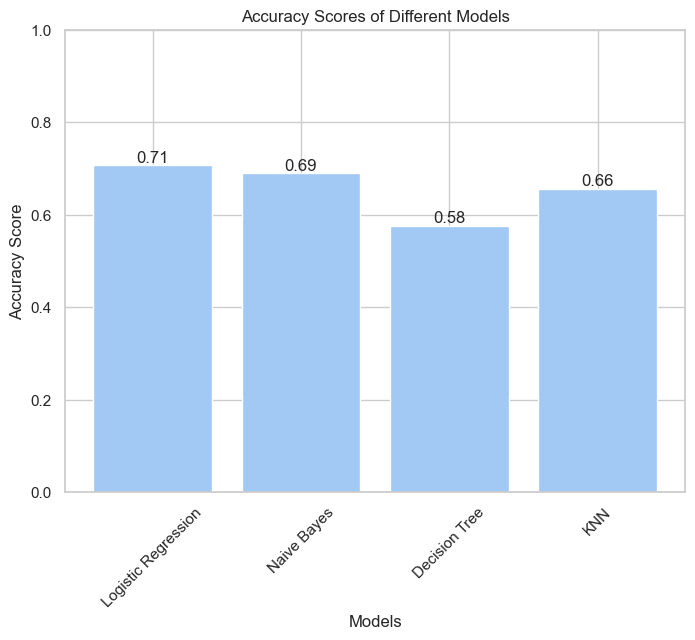

In [44]:
model_names = ['Logistic Regression', 'Naive Bayes', 'Decision Tree', 'KNN']
scores = [log_reg_score, nb_accuracy, decision_tree.score(X_test, y_test), knn.score(X_test, y_test)]

plt.figure(figsize=(8, 6))
plt.bar(model_names, scores)
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores of Different Models')
plt.ylim(0, 1)
plt.xticks(rotation=45)
for i in range(len(model_names)):
    plt.text(i, scores[i], f'{scores[i]:.2f}', ha='center', va='bottom')

plt.show()


# Sonuç Raporu

Kredi riski taşıyan kişileri çeşitli analizler kullanarak önceden tahmin etmek ve bu sayede insanların kredi riski taşıyıp taşımadığını borç verilip verilmeyeceğini anlamak mümkündür.Bu çalışmada Logistic Regression , Naive Bayes , Decision Tree ve kNN algoritmaları kullanılmıştır.
Analiz ettiğimiz veri tabanı için seçilen en uygun algoritma Logistic Regressiondur.Lojistik regresyon analimizin sonucunda %71 başarılı tahmin skoru elde ettik.Kredi riskine sebep olan temel faktör borç ödeme süresidir.
Borç ödeme süresini Kredi Miktarı ve Kredi Geçmişi takip ediyor.Logistic Regression algoritması genellikle sınıflandırma problemlerinde kullanılan etkili bir yöntemdir ve bu durumda da uygun bir seçim olmuş gibi görünmektedir.
